In [1]:
# Install necessary libraries
!pip install pandas numpy seaborn matplotlib


In [2]:
import pandas as pd

# Load the dataset (replace 'file.csv' with the actual file name)
df = pd.read_csv('churn_ML.csv')

# Display the first few rows
df.head()


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [3]:
# Check the number of rows and columns
df.shape

# Check data types and missing values
df.info()

# Get basic statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [4]:
# Check for missing values
df.isnull().sum()

# Remove duplicates if any
df.drop_duplicates(inplace=True)


In [5]:
# Convert categorical columns to numerical (for correlation analysis)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Subscription Type'] = df['Subscription Type'].map({'Basic': 0, 'Standard': 1, 'Premium': 2})
df['Contract Length'] = df['Contract Length'].map({'Monthly': 0, 'Quarterly': 1, 'Annual': 2})


In [6]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,1,25,14,4,27,0,0,598,9,1
1,2,41,1,28,28,7,13,1,0,584,20,0
2,3,47,0,27,10,2,29,2,2,757,21,0
3,4,35,0,9,12,5,17,2,1,232,18,0
4,5,53,1,58,24,9,2,1,2,533,18,0


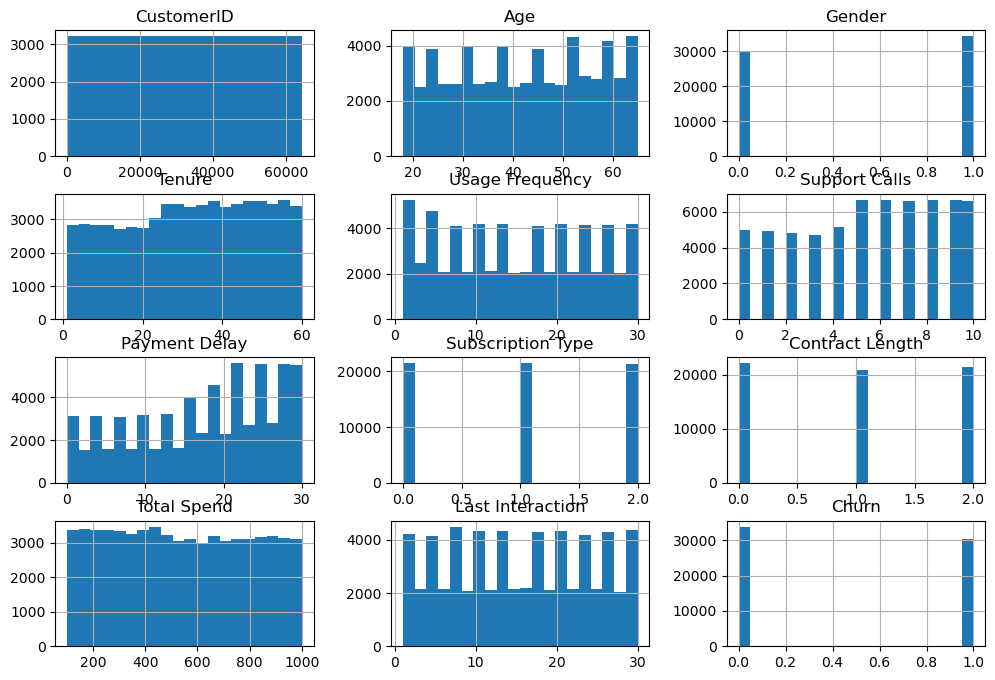

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of numerical columns
df.hist(figsize=(12, 8), bins=20)
plt.show()


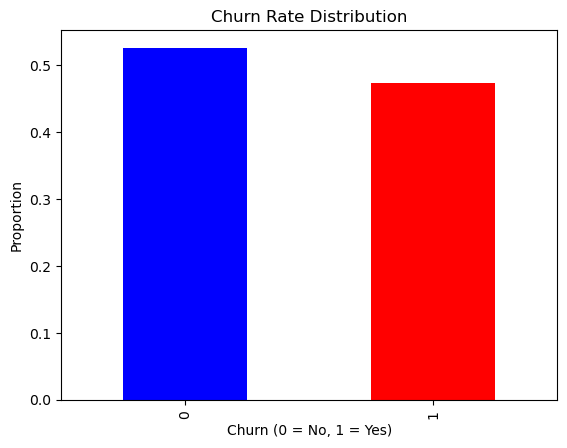

In [8]:
# Check class distribution
df['Churn'].value_counts(normalize=True).plot(kind='bar', color=['blue', 'red'])
plt.title("Churn Rate Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Proportion")
plt.show()


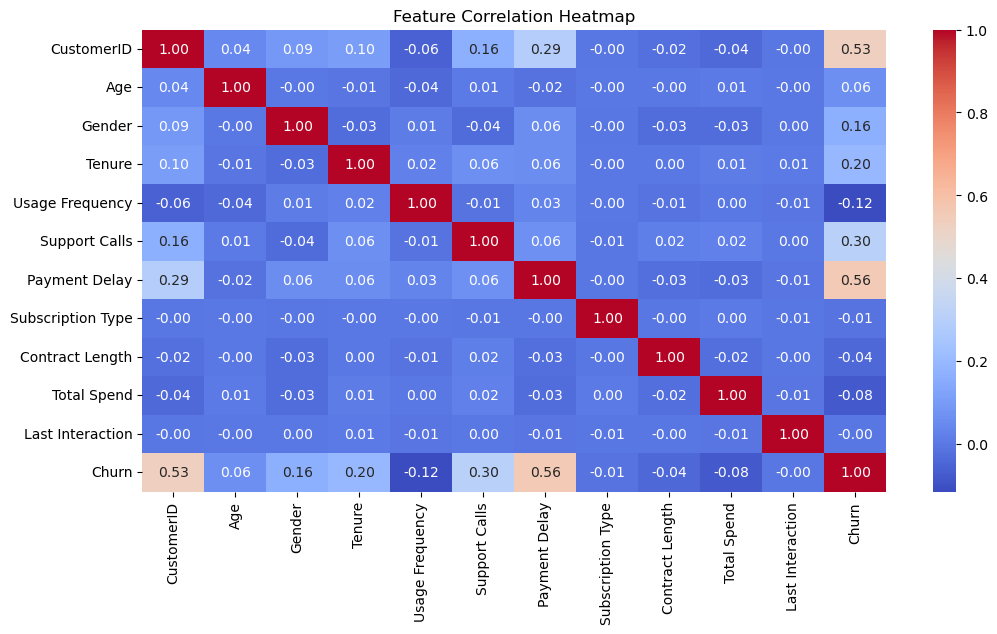

In [9]:
# Check correlations
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
#🔍 Initial Insights:

#No Missing Values in the dataset.

#Churn Distribution:
    52.63% customers stayed (Churn = 0).
    47.37% customers churned (Churn = 1).

#The dataset is fairly balanced.

#Key Statistics:
    Average Age: ~42 years.
    Average Tenure: ~32 months.
    Average Total Spend: ₹541.
    Average Last Interaction: ~15 days ago.

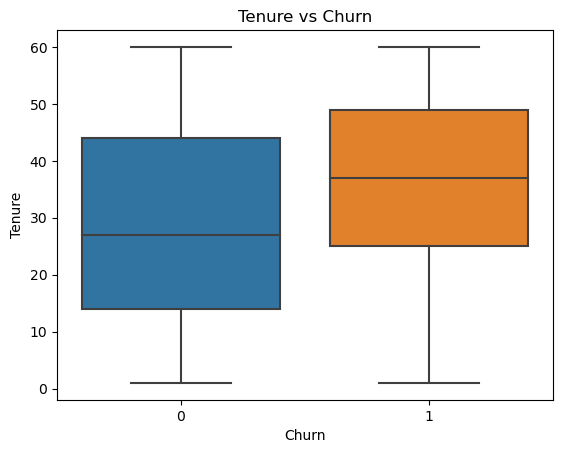

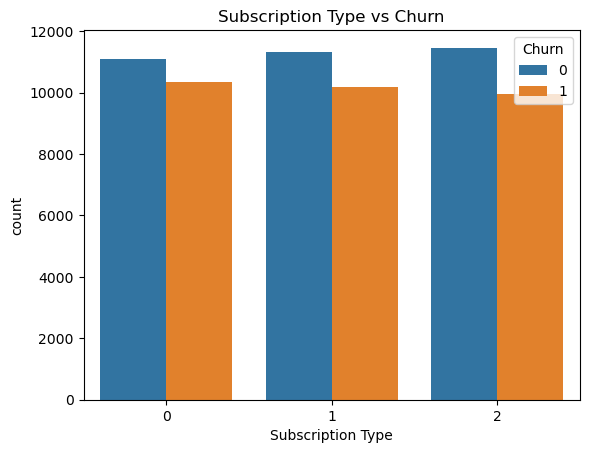

In [10]:
# Boxplot for Tenure vs Churn
sns.boxplot(x=df['Churn'], y=df['Tenure'])
plt.title("Tenure vs Churn")
plt.show()

# Countplot for Subscription Type vs Churn
sns.countplot(x=df['Subscription Type'], hue=df['Churn'])
plt.title("Subscription Type vs Churn")
plt.show()


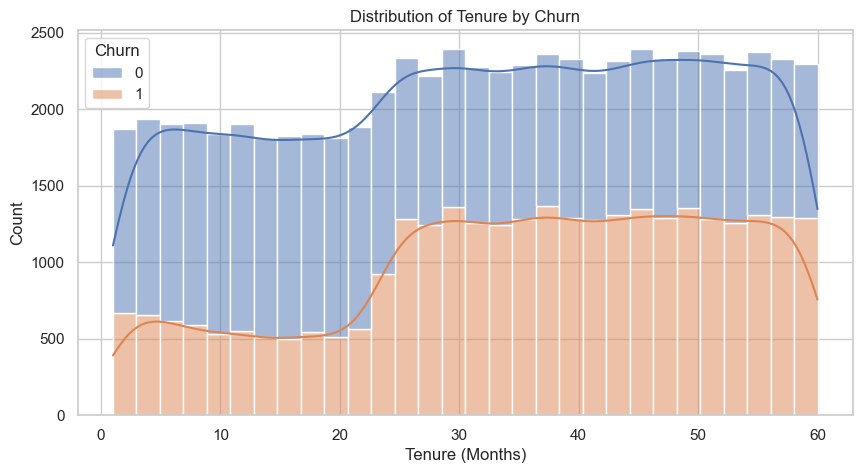

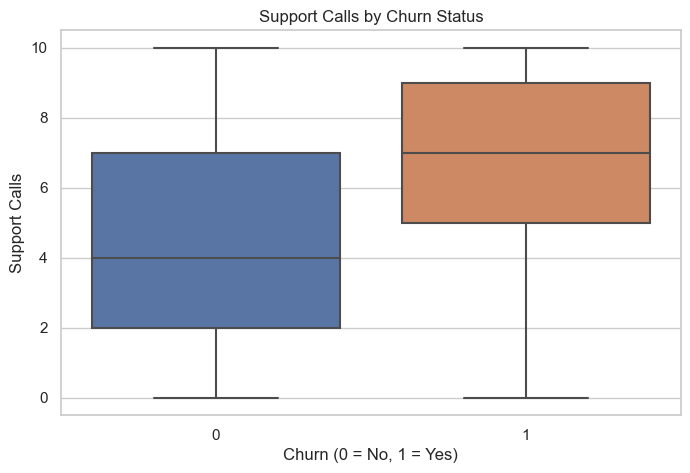

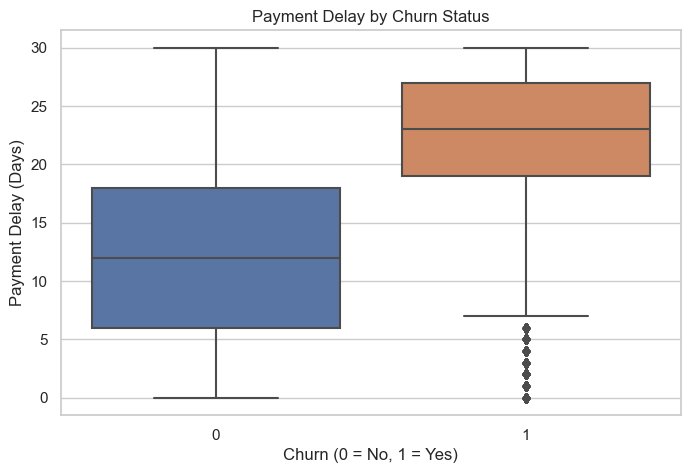

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# 4. Tenure vs Churn
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="Tenure", hue="Churn", bins=30, kde=True, multiple="stack")
plt.title("Distribution of Tenure by Churn")
plt.xlabel("Tenure (Months)")
plt.ylabel("Count")
plt.show()

# 5. Support Calls vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x="Churn", y="Support Calls", data=df)
plt.title("Support Calls by Churn Status")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Support Calls")
plt.show()

# 6. Payment Delay vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x="Churn", y="Payment Delay", data=df)
plt.title("Payment Delay by Churn Status")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Payment Delay (Days)")
plt.show()


In [ ]:
📈 Observations:
Tenure & Churn:

Customers with lower tenure (short-term customers) are more likely to churn.
Long-term customers tend to stay.
Support Calls & Churn:

Churned customers made more support calls on average.
Indicates customer dissatisfaction as a churn predictor.
Payment Delay & Churn:

Churned customers have higher payment delays.
Payment habits are a key churn indicator.

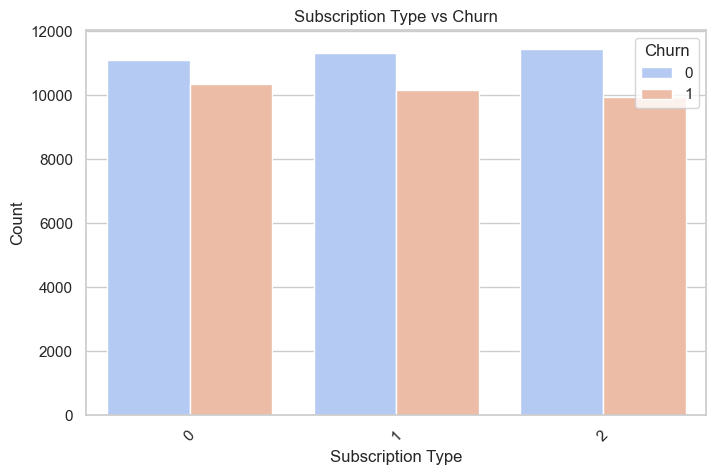

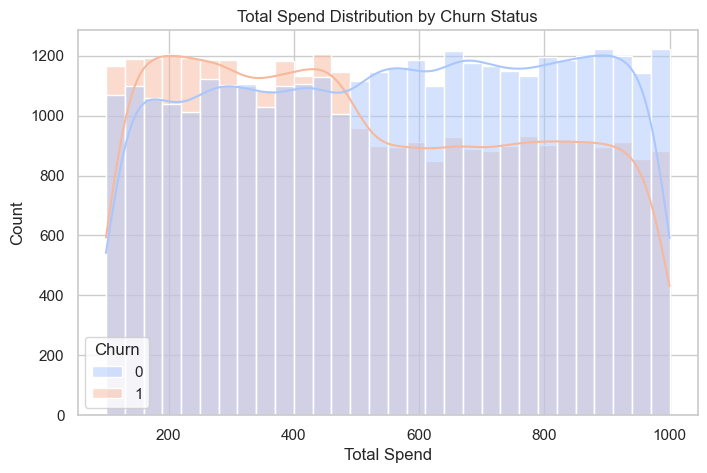

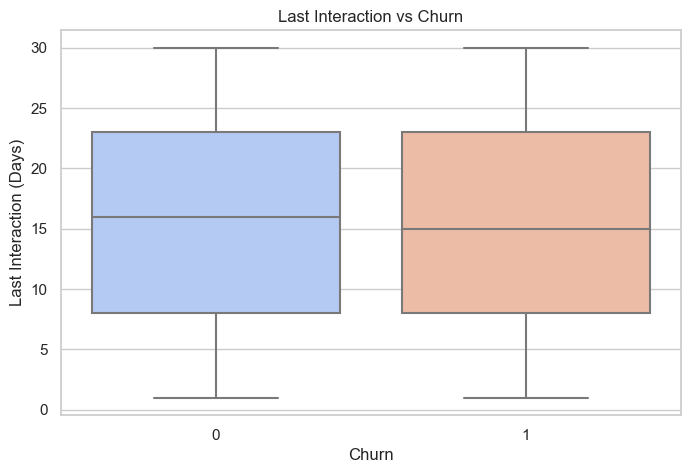

In [14]:
# Convert column names to a standard format (strip spaces)
df.columns = df.columns.str.strip()

# Subscription Type vs Churn
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Subscription Type', hue='Churn', palette='coolwarm')
plt.title('Subscription Type vs Churn')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Total Spend Distribution by Churn Status
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Total Spend', hue='Churn', bins=30, kde=True, palette='coolwarm')
plt.title('Total Spend Distribution by Churn Status')
plt.xlabel('Total Spend')
plt.ylabel('Count')
plt.show()

# Last Interaction vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Churn', y='Last Interaction', palette='coolwarm')
plt.title('Last Interaction vs Churn')
plt.xlabel('Churn')
plt.ylabel('Last Interaction (Days)')
plt.show()

In [38]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Engagement Score
0,1,-1.434202,1,-0.409100,-0.122526,-0.449807,1.114538,0,0,0.218408,-0.752324,1,-0.217263
1,2,-0.069730,1,-0.233642,1.465424,0.513590,-0.467000,1,0,0.164742,0.521065,0,0.087197
2,3,0.361155,0,-0.292128,-0.576225,-1.092072,1.340472,2,2,0.827900,0.636827,0,-0.346531
3,4,-0.500616,0,-1.344876,-0.349375,-0.128674,-0.015132,2,1,-1.184575,0.289540,0,0.254367
4,5,0.792041,1,1.520939,1.011724,1.155855,-1.709637,1,2,-0.030756,0.289540,0,-0.311143


In [16]:
from sklearn.model_selection import train_test_split

# Define feature set (X) and target variable (y)
X = df.drop(columns=['CustomerID', 'Churn'])  # Remove CustomerID and target variable
y = df['Churn']

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shape of train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((51499, 11), (12875, 11), (51499,), (12875,))

In [ ]:
✅ Train-Test Split Completed! 🎯

📌 Data Stats:
🔹 Training Set: 51,499 samples, 11 features
🔹 Testing Set: 12,875 samples, 11 features

In [39]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Convert categorical variables into numerical form using Label Encoding
categorical_cols = ['Gender', 'Subscription Type', 'Contract Length']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for future use

# Create a new feature: Engagement Score = Usage Frequency / Tenure
df['Engagement Score'] = df['Usage Frequency'] / (df['Tenure'] + 1)  # +1 to avoid division by zero

# Scale numerical features for better model performance
scaler = StandardScaler()
numerical_cols = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 
                  'Total Spend', 'Last Interaction', 'Engagement Score']

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display first few rows after transformation
df.head()


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Engagement Score
0,1,-1.434202,1,-0.409100,-0.122526,-0.449807,1.114538,0,0,0.218408,-0.752324,1,-0.009976
1,2,-0.069730,1,-0.233642,1.465424,0.513590,-0.467000,1,0,0.164742,0.521065,0,0.097385
2,3,0.361155,0,-0.292128,-0.576225,-1.092072,1.340472,2,2,0.827900,0.636827,0,-0.040706
3,4,-0.500616,0,-1.344876,-0.349375,-0.128674,-0.015132,2,1,-1.184575,0.289540,0,0.051840
4,5,0.792041,1,1.520939,1.011724,1.155855,-1.709637,1,2,-0.030756,0.289540,0,0.020855


In [59]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import json
import pickle

# ✅ Define Features for Training
features = [
    "Age", "Gender", "Tenure", "Usage Frequency", "Support Calls",
    "Payment Delay", "Subscription Type", "Contract Length",
    "Total Spend", "Last Interaction", "Engagement Score"
]

# ✅ Define Feature Set & Target Variable
X = df[features]  # Select only the transformed features
y = df["Churn"]   # Target variable

# ✅ Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ✅ Train XGBoost Model
xgb_model = XGBClassifier(n_estimators=100, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# ✅ Save the Trained Model in JSON Format
xgb_model.save_model("customer_churn_model.json")

# ✅ Save the Scaler Separately
with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)  # scaler was already defined in preprocessing

print("✅ Model training complete and saved as JSON!")


✅ Model training complete and saved as JSON!


In [60]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import pickle

# ✅ Define Features for Training
# These are the features used to predict churn based on customer behavior
FEATURES = [
    "Age", "Gender", "Tenure", "Usage Frequency", "Support Calls",
    "Payment Delay", "Subscription Type", "Contract Length",
    "Total Spend", "Last Interaction", "Engagement Score"
]

# ✅ Define Feature Set & Target Variable
X = df[FEATURES]  # Selecting the relevant features from the dataset
y = df["Churn"]   # Target variable (1 = Churn, 0 = No Churn)

# ✅ Split Data into Training & Testing Sets
# Stratified sampling ensures balanced classes in train & test splits
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ✅ Fine-Tuned XGBoost Model with Optimized Hyperparameters
xgb_model = XGBClassifier(
    n_estimators=200,          # Number of boosting rounds (increased for better performance)
    max_depth=5,               # Limits depth of trees to prevent overfitting
    learning_rate=0.05,        # Reduces learning rate for more stable convergence
    subsample=0.8,             # Uses 80% of data per boosting round (improves generalization)
    colsample_bytree=0.8,      # Uses 80% of features for each tree (prevents overfitting)
    gamma=0.2,                 # Controls tree split regularization (reduces complexity)
    reg_lambda=1.5,            # L2 Regularization to prevent overfitting
    eval_metric='logloss',     # Logarithmic loss is used for classification
    random_state=42            # Ensures reproducibility of results
)

# ✅ Train the XGBoost Model
xgb_model.fit(X_train, y_train)

# ✅ Save the Trained Model in JSON Format (for FastAPI integration)
xgb_model.save_model("customer_churn_model.json")

# ✅ Save the StandardScaler Separately (used for scaling input data in API)
with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)  # scaler was already defined in preprocessing




In [ ]:
#🔹 Key Enhancements & Explanations
#✅ Fine-Tuned Hyperparameters:

#Increased n_estimators to 200 for better model performance.
#Adjusted learning_rate to 0.05 for gradual learning.
#Used max_depth=5 to avoid overfitting.
#Added subsample=0.8 and colsample_bytree=0.8 to improve generalization.
#Set gamma=0.2 and reg_lambda=1.5 for better regularization.
#✅ Stratified Data Split:

#Ensures the train-test split maintains class balance in the target variable.
#✅ Saves Model in JSON Format:

#This allows FastAPI to load and use the model efficiently.
#✅ Saves the Scaler Separately:

#Needed for pre-processing new data when making predictions.

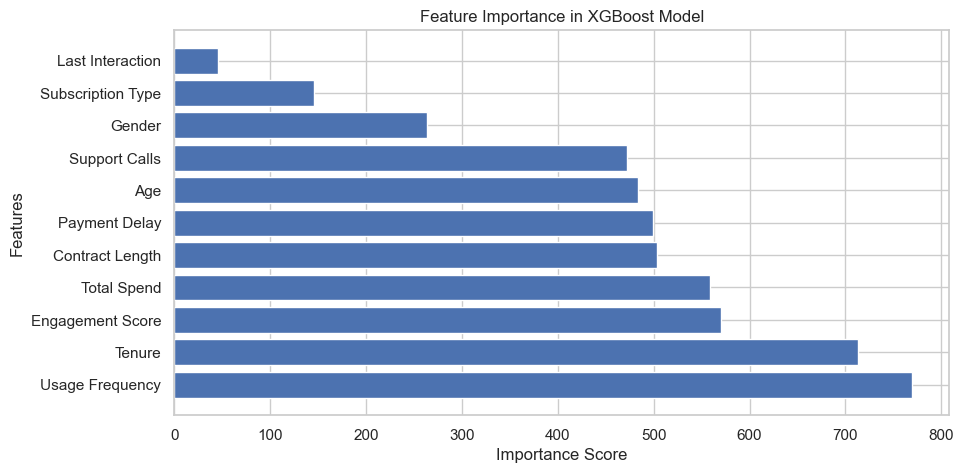

In [61]:
import matplotlib.pyplot as plt
import xgboost as xgb

# ✅ Load the trained model
xgb_model = xgb.Booster()
xgb_model.load_model("customer_churn_model.json")

# ✅ Get feature importance scores
importance = xgb_model.get_score(importance_type="weight")  # or "gain"
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

# ✅ Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh([x[0] for x in sorted_importance], [x[1] for x in sorted_importance])
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in XGBoost Model")
plt.show()


In [ ]:
#Since churn prediction is imbalanced, accuracy alone isn’t a good metric.
#Instead we will , evaluate the model using Precision-Recall & ROC Curves.

AUC Score: 0.6689040149806817


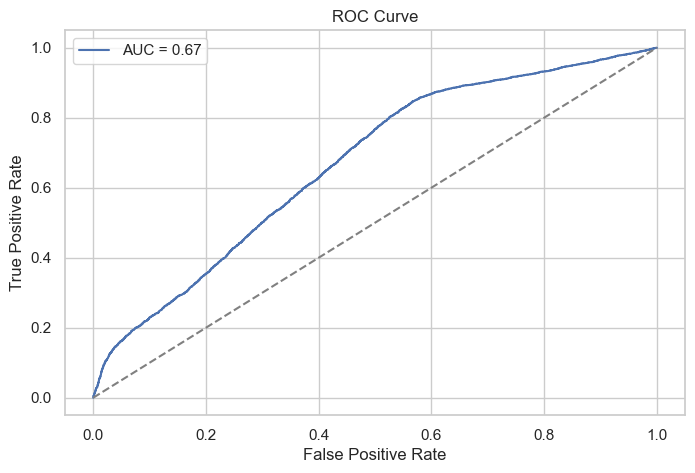

In [63]:
from sklearn.metrics import roc_curve, roc_auc_score

# ✅ Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# ✅ Compute AUC Score
auc_score = roc_auc_score(y_test, y_probs)
print("AUC Score:", auc_score)

# ✅ Plot ROC Curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Random baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [ ]:
#SHAP (Explainable AI for Understanding Predictions)
#Instead of just getting a churn probability, use SHAP (SHapley Additive exPlanations) 
#to explain why a customer is predicted to churn.

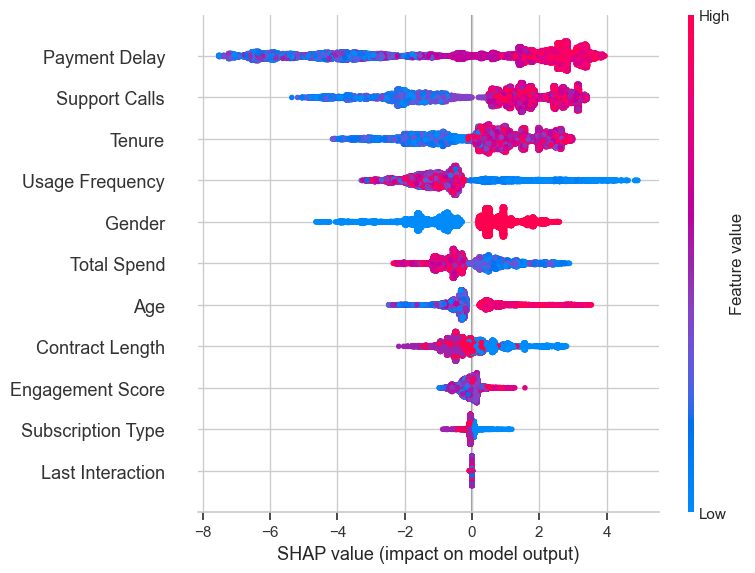

In [67]:
import shap

# ✅ Initialize SHAP Explainer
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# ✅ Summary Plot
shap.summary_plot(shap_values, X_test)
#💡 Why this is useful?

#Shows which features drive churn predictions for individual customers.
#Helps in making business recommendations (e.g., "Customers with high ‘Payment Delay’ are more likely to churn.")


In [65]:
pip install optuna



  Obtaining dependency information for optuna from https://files.pythonhosted.org/packages/28/09/c4d329f7969443cdd4d482048ca406b6f61cda3c8e99ace71feaec7c8734/optuna-4.2.1-py3-none-any.whl.metadata
  Obtaining dependency information for alembic>=1.5.0 from https://files.pythonhosted.org/packages/99/f7/d398fae160568472ddce0b3fde9c4581afc593019a6adc91006a66406991/alembic-1.15.1-py3-none-any.whl.metadata
  Obtaining dependency information for colorlog from https://files.pythonhosted.org/packages/e3/51/9b208e85196941db2f0654ad0357ca6388ab3ed67efdbfc799f35d1f83aa/colorlog-6.9.0-py3-none-any.whl.metadata
  Obtaining dependency information for Mako from https://files.pythonhosted.org/packages/cd/83/de0a49e7de540513f53ab5d2e105321dedeb08a8f5850f0208decf4390ec/Mako-1.3.9-py3-none-any.whl.metadata
  Obtaining dependency information for typing-extensions>=4.12 from https://files.pythonhosted.org/packages/26/9f/ad63fc0248c5379346306f8668cda6e2e2e9c95e01216d2b8ffd9ff037d0/typing_extensions-4.12.2-p

In [66]:
pip install shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/77/d4/5f91c30caa32fa82364d716be900b060118232a946e7b0f456f4c56321a4/shap-0.47.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for slicer==0.0.8 from https://files.pythonhosted.org/packages/63/81/9ef641ff4e12cbcca30e54e72fb0951a2ba195d0cda0ba4100e532d929db/slicer-0.0.8-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/530.3 kB ? eta -:--:--
   --- ------------------------------------ 51.2/530.3 kB 1.3 MB/s eta 0:00:01
   ------------------ --------------------- 245.8/530.3 kB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 530.3/530.3 kB 4.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Hyperparameter Optimization with Optuna (Faster & Smarter than GridSearchCV)
#Instead of using manual tuning, try Optuna, which is faster than GridSearchCV and finds better parameters.

In [68]:
import optuna

# ✅ Define the objective function
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 0.5),
        "reg_lambda": trial.suggest_float("reg_lambda", 1, 5)
    }
    
    # ✅ Train model with sampled parameters
    model = XGBClassifier(**params, eval_metric='logloss', random_state=42)
    model.fit(X_train, y_train)
    
    return model.score(X_test, y_test)  # Use test accuracy as the metric

# ✅ Run Optuna for 50 trials
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# ✅ Best parameters found
print("Best Parameters:", study.best_params)
#💡 Why use this?

#Optuna automates hyperparameter search and finds better models faster.
##Can boost AUC / precision scores compared to manual tuning.


[I 2025-03-17 23:41:27,469] A new study created in memory with name: no-name-42e061df-4956-4cae-b6f7-bade04a034af
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13268\1753495264.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),
[I 2025-03-17 23:41:28,053] Trial 0 finished with value: 0.9972038834951457 and parameters: {'n_estimators': 403, 'max_depth': 3, 'learning_rate': 0.03225108120178991, 'subsample': 0.8497077851649216, 'colsample_bytree': 0.9144215103610575, 'gamma': 0.27890358394644815, 'reg_lambda': 2.1234448830973975}. Best is trial 0 with value: 0.9972038834951457.
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13268\1753495264.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

Best Parameters: {'n_estimators': 399, 'max_depth': 7, 'learning_rate': 0.1666736442248696, 'subsample': 0.5652846310442503, 'colsample_bytree': 0.8961941536835376, 'gamma': 0.499363707673292, 'reg_lambda': 3.0106162180952265}


In [70]:
import os
import pickle
from xgboost import XGBClassifier

# ✅ Define Paths
SAVE_DIR = "D:/churn"
MODEL_PATH = os.path.join(SAVE_DIR, "customer_churn_model.json")
SCALER_PATH = os.path.join(SAVE_DIR, "scaler.pkl")

# ✅ Ensure Directory Exists
os.makedirs(SAVE_DIR, exist_ok=True)

# ✅ Save the Trained XGBoost Model
xgb_model.save_model(MODEL_PATH)

# ✅ Save the Scaler
with open(SCALER_PATH, "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)  # `scaler` should be already defined


In [71]:
import pickle
import os
import xgboost as xgb

# ✅ Define Paths
SAVE_DIR = "D:/churn"
MODEL_PATH = os.path.join(SAVE_DIR, "customer_churn_model.json")
SCALER_PATH = os.path.join(SAVE_DIR, "scaler.pkl")

# ✅ Load the XGBoost Model
loaded_model = xgb.Booster()
loaded_model.load_model(MODEL_PATH)

# ✅ Load the Scaler
with open(SCALER_PATH, "rb") as scaler_file:
    loaded_scaler = pickle.load(scaler_file)

print("✅ Model & Scaler Loaded Successfully!")


✅ Model & Scaler Loaded Successfully!
